In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [192]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-03-20 15:23:05--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.10, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.2’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 15:23:05 (2.32 GB/s) - ‘aerofit_treadmill.csv?1639992749.2’ saved [7279/7279]



In [193]:
df = pd.read_csv('aerofit_treadmill.csv?1639992749')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Missing Values Detection


In [194]:
cols = ['Product','Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']
count = []

for col in cols:
  temp = 0
  temp = df[col].isna().sum()
  temp = temp + df[col].isin([float('inf'), float('-inf')]).sum()
  count.append(temp)

index = 0
for var in count:
  print(f"Count of missing values nan/inf/-inf in the vector {cols[index]} : {var}")
  index = index + 1


Count of missing values nan/inf/-inf in the vector Product : 0
Count of missing values nan/inf/-inf in the vector Age : 0
Count of missing values nan/inf/-inf in the vector Gender : 0
Count of missing values nan/inf/-inf in the vector Education : 0
Count of missing values nan/inf/-inf in the vector MaritalStatus : 0
Count of missing values nan/inf/-inf in the vector Usage : 0
Count of missing values nan/inf/-inf in the vector Fitness : 0
Count of missing values nan/inf/-inf in the vector Income : 0
Count of missing values nan/inf/-inf in the vector Miles : 0


## Observation :
##### There are no missing values in the data.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [196]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## **Descriptive Analysis**

*   There are 180 rows in total in the dataset
*   Age: Mean age is 28.7 years, mean of half of customers is 26 years
*   Age ranges between 18 yrs and 50 yrs.
*   Income: Average income is 53719(approx), while the income ranges between 29562(approx 30000) and 104581(approx 105000)
*   Fitness: Average rating is 3.3 on a scale of 5
*   Miles: Average usage per week is 3.4, with max 7





In [197]:
# Total number of unique product ids
df['Product'].nunique()

3

In [198]:
# Total number of unique treadmill products
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

In [199]:
# Number of unique ages
df['Age'].nunique()

32

In [200]:
# List of unique ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [201]:
# Total number of male and female customers
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

### Value Counts and Unique Attributes

In [202]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [203]:
prod_counts = df['Product'].value_counts()
prod_counts

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [204]:
age_counts = df['Age'].value_counts()
age_counts

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [205]:
# Total number of customers who are married and unmarried
maritalStatus_counts = df['MaritalStatus'].value_counts()
maritalStatus_counts

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [206]:
usage_counts = df['Usage'].value_counts()
usage_counts

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [207]:
fitness_counts = df['Fitness'].value_counts()
fitness_counts

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [208]:
product_list = df['Product'].value_counts().values.tolist()
product_list

[80, 60, 40]

In [209]:
temp = np.round(df['Product'].value_counts(normalize = True)*100).to_frame()
temp.values.tolist()

[[44.0], [33.0], [22.0]]

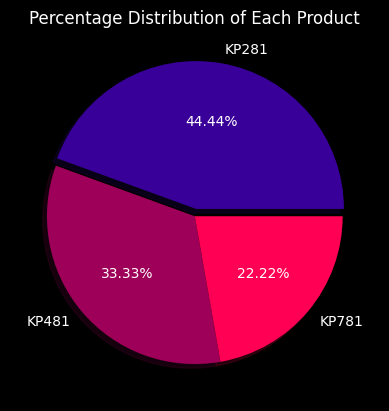

In [210]:
product_percentage_dist = np.round(df['Product'].value_counts(normalize = True)*100).to_frame()
product_colors = ['#390099', '#9e0059', '#ff0054']
product_explode_values = [0.05, 0.0001, 0.0002]
plt.pie(product_list, labels = product_percentage_dist.index, colors=product_colors, explode = product_explode_values, autopct='%.2f%%', shadow=True)
plt.title("Percentage Distribution of Each Product")
plt.show()


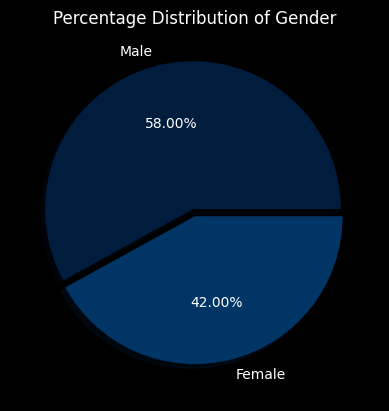

In [211]:
gender_percentage_dist = np.round(df['Gender'].value_counts(normalize = True)*100).to_frame()
gender_colors = ['#001d3d', '#003566', '#ffc300']
gender_explode_values = [0.05, 0.0001]
plt.pie(gender_percentage_dist['Gender'], labels = gender_percentage_dist.index, colors=gender_colors, explode = gender_explode_values, autopct='%.2f%%', shadow=True)
plt.title("Percentage Distribution of Gender")
plt.show()

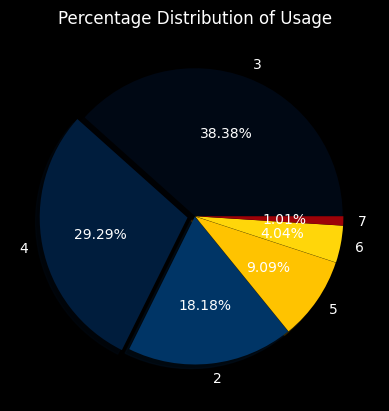

In [212]:
usage_percentage_dist = np.round(df['Usage'].value_counts(normalize = True)*100).to_frame()
usage_percentage_dist.values.tolist()
lst = []
for each in usage_percentage_dist.values.tolist():
  lst.append(each[0])
lst
usage_colors = ['#000814', '#001d3d', '#003566', '#ffc300', '#ffd60a', '#9d0208']
usage_explode_values = [0.001, 0.05, 0.003, 0.004, 0.005, 0.005]
plt.pie(lst, labels = usage_percentage_dist.index, colors=usage_colors, explode = usage_explode_values, autopct='%.2f%%', shadow=True)
plt.title("Percentage Distribution of Usage")
plt.show()

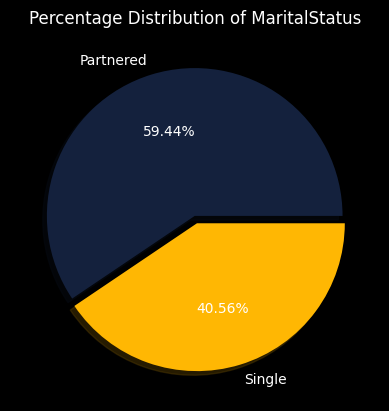

In [213]:
maritalStatus_distribution = df['MaritalStatus'].value_counts()
maritalStatus_distribution
maritalStatus_colors = ['#14213d', '#ffb703']
maritalStatus_explode_values = [0.002, 0.05]
plt.pie(maritalStatus_distribution.tolist(), labels = maritalStatus_distribution.index, colors=maritalStatus_colors, explode = maritalStatus_explode_values, autopct='%.2f%%', shadow=True)
plt.title("Percentage Distribution of MaritalStatus")
plt.show()

## Insights from the above pie charts
* Nearly half of the customer (44.44%) prefer to buy the KP281 treadmill
* 58% of the customers were male, while other 48% were females.
* 38% of the customers use treadmill 3 days a week
* Nearly 60% of the buyers are partnered, while 40% are single

# Univariate Analysis

## Distribution of Age of Treadmill Customers


In [214]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


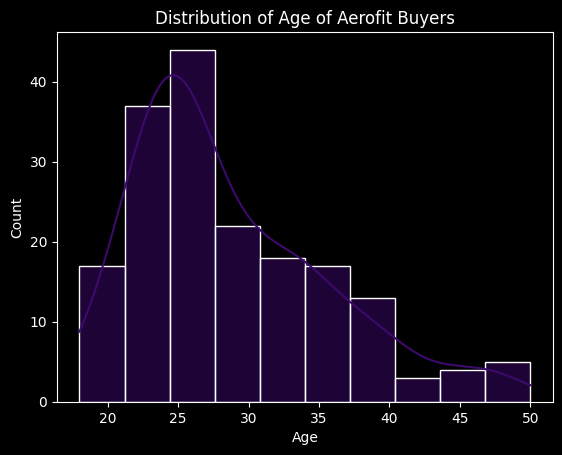

In [215]:
sns.histplot(df['Age'], kde = True, bins=10, color="#3c096c", line_kws={"color":'#ffc300'})
plt.title("Distribution of Age of Aerofit Buyers")
plt.show()

### Some Calculations


In [216]:
# Number of customers between the age group 20 to 40 years
x1 = df[(df['Age']>=20) & (df['Age']<=40)]['Age'].count()

# Percentage of Customers between the age group of 20 to 40
p1 = x1/(df['Age'].count())*100
# Percentage of Customers above the age of 40 years
p2 = 100-p1

np.round(p1,2), np.round(p2,2)


(90.56, 9.44)

### Univariate Analysis for the above age distribution
##### More than 90% of the aerofit buyers belong to the age group 20 to 40 years
##### Less than 10% of the total customers have age > 49

<Axes: xlabel='Age'>

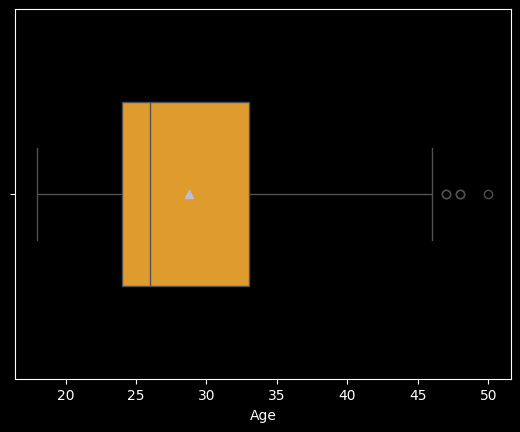

In [217]:
sns.boxplot(data = df['Age'], orient='h', width=0.5, showmeans=True, color="#fca311")

In [218]:
age_data = df['Age']
mean = np.round(age_data.mean(), 2)
print("Mean : ", mean)
median = np.round(age_data.median(), 2)
print("Median : ", median)
q1 = age_data.quantile(.25)
q3 = age_data.quantile(.75)

IQR = (q3-q1)
print("InterQuartile Range for Age : ",IQR)
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print("Lower Bound : ", lower_bound)
print("Upper Bound : ", upper_bound)

outliers = df[(df['Age']>upper_bound) | (df['Age']<lower_bound)]['Age'].count()
print("Number of outliers : ", outliers)

Mean :  28.79
Median :  26.0
InterQuartile Range for Age :  9.0
Lower Bound :  10.5
Upper Bound :  46.5
Number of outliers :  5



##### Mean :  28.79
##### Median :  26.0
##### InterQuartile Range for Age :  9.0
##### Lower Bound :  10.5
##### Upper Bound :  46.5
##### Number of outliers :  5




# Distribution of Education of Aerofit Buyers

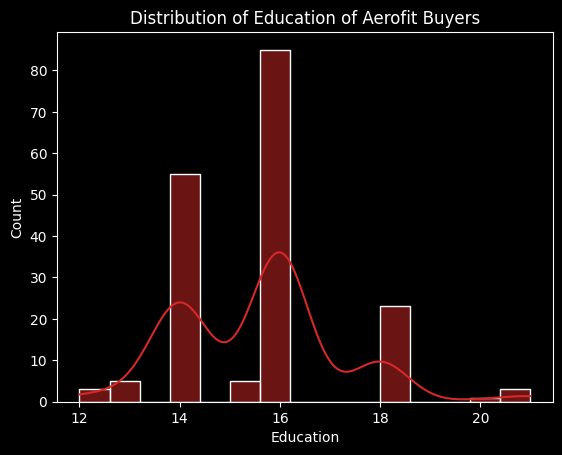

In [219]:
sns.histplot(df['Education'], kde = True, bins=15, color="#d62828", line_kws={"color":'#ffc300'})
plt.title("Distribution of Education of Aerofit Buyers")
plt.show()

## Calculations


In [220]:
x1 = df[(df['Education']>=12) & (df['Education']<=16)]['Education'].count()
p1 = x1/(df['Education'].count())*100
x2 = df[(df['Education']>16)]['Education'].count()
p2 = x2/df['Education'].count() * 100

np.round(p1,2), np.round(p2,2)

(85.0, 15.0)

### Univariate Analysis of Education of Aerofit Customers

##### About 85% of the total customers have completed 12 to 16 years of education
##### On the other hand, 15% of the total buyers have more than 16 years of education

<Axes: xlabel='Education'>

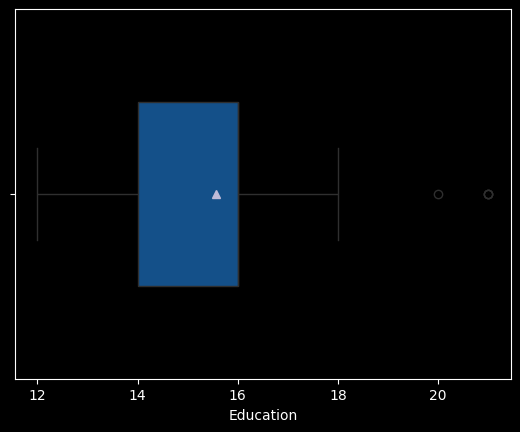

In [221]:
sns.boxplot(data = df['Education'], orient='h', width=0.5, showmeans=True, color="#00509d")

In [222]:
education_data = df['Education']
mean = np.round(education_data.mean(), 2)
print("Mean : ", mean)
median = np.round(education_data.median(), 2)
print("Median : ", median)
q1 = education_data.quantile(.25)
q3 = education_data.quantile(.75)

IQR = (q3-q1)
print("InterQuartile Range for Education : ",IQR)
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print("Lower Bound : ", lower_bound)
print("Upper Bound : ", upper_bound)

outliers = df[(df['Education']>upper_bound) | (df['Education']<lower_bound)]['Education'].count()
print("Number of outliers : ", outliers)

Mean :  15.57
Median :  16.0
InterQuartile Range for Education :  2.0
Lower Bound :  11.0
Upper Bound :  19.0
Number of outliers :  4


# Distribution of Income of Various Customers

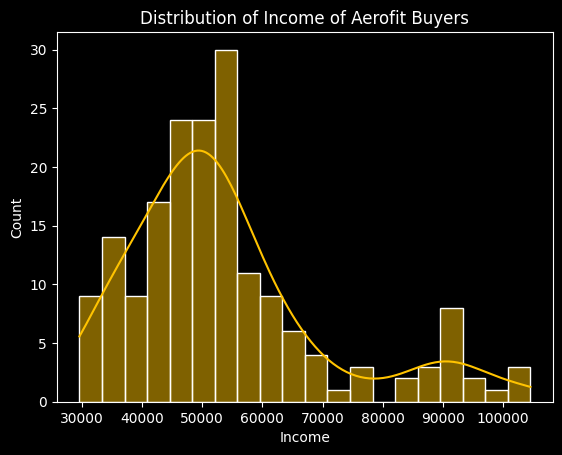

In [223]:
sns.histplot(df['Income'], kde = True, bins=20, color="#ffc300", line_kws={"color":'#ffc300'})
plt.title("Distribution of Income of Aerofit Buyers")
plt.show()

## Calculations

In [224]:
x1 = df[df['Income']<=70000]['Income'].count()
p1 = x1/df['Income'].count() * 100
p2 = 100-p1
p3 = (df[df['Income']>=100000]['Income'].count())/(df['Income'].count()) * 100
np.round(p1,2), np.round(p2,2), np.round(p3, 2)

(87.22, 12.78, 1.67)

### Univariate Analysis of Income of Aerofit Customers

##### More than 85% of the total buyers have an annual income < $70000

##### Approximately 12% of the total aerofit customers have annual income greater than $70000

##### Less than 2% of the customers annual salary is > $100000

<Axes: xlabel='Income'>

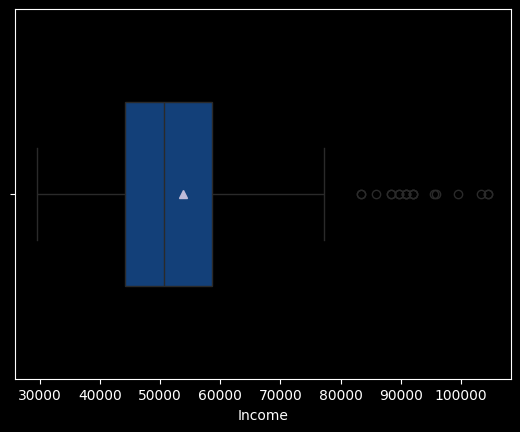

In [225]:
sns.boxplot(data = df['Income'], orient='h', width=0.5, showmeans=True, color="#023e8a")

In [226]:
income_data = df['Income']
mean = np.round(income_data.mean(), 2)
print("Mean : ", mean)
median = np.round(income_data.median(), 2)
print("Median : ", median)
q1 = income_data.quantile(.25)
q3 = income_data.quantile(.75)

IQR = (q3-q1)
print("InterQuartile Range for Income : ",IQR)
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print("Lower Bound : ", lower_bound)
print("Upper Bound : ", upper_bound)

outliers = df[(df['Income']>upper_bound) | (df['Income']<lower_bound)]['Income'].count()
print("Number of outliers : ", outliers)

Mean :  53719.58
Median :  50596.5
InterQuartile Range for Income :  14609.25
Lower Bound :  22144.875
Upper Bound :  80581.875
Number of outliers :  19


# Distribution of Miles Walked by Covered by Aerofit Customers Per Week

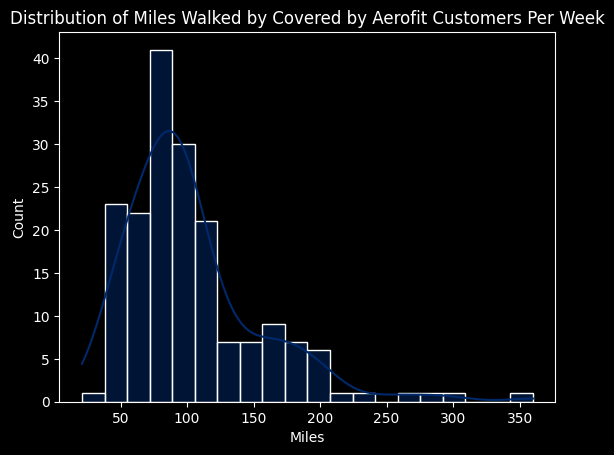

In [227]:
sns.histplot(df['Miles'], kde = True, bins=20, color="#00296b", line_kws={"color":'#ffc300'})
plt.title("Distribution of Miles Walked by Covered by Aerofit Customers Per Week")
plt.show()

## Some Calculations

In [228]:
x1 = df[df['Miles']<=120]['Miles'].count()
p1 = x1/(df['Miles'].count()) * 100
p2 = 100-p1

np.round(p1, 2), np.round(p2, 2)

(76.67, 23.33)

### Univariate Analysis for Miles Covered by Customers Each Week

##### More than 75% of the customers cover less than 120 miles a week
##### Only about 3% of the customers walk more than 200 miles a week
##### Most customers prefer to walk/run 50 to 100 miles in a week

<Axes: xlabel='Miles'>

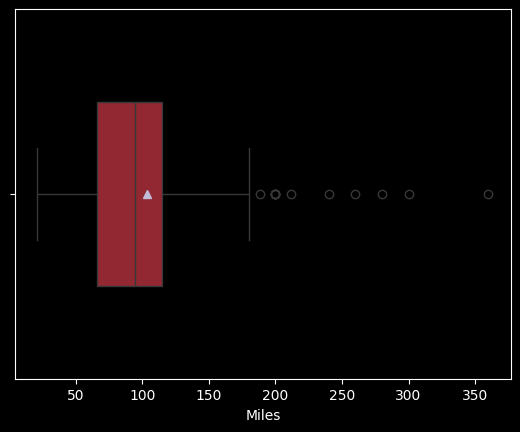

In [229]:
sns.boxplot(data = df['Miles'], orient='h', width=0.5, showmeans=True, color="#a41623")

In [230]:
miles_data = df['Miles']
mean = np.round(miles_data.mean(), 2)
print("Mean : ", mean)
median = np.round(miles_data.median(), 2)
print("Median : ", median)
q1 = miles_data.quantile(.25)
q3 = miles_data.quantile(.75)

IQR = (q3-q1)
print("InterQuartile Range for Miles : ",IQR)
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print("Lower Bound : ", lower_bound)
print("Upper Bound : ", upper_bound)

outliers = df[(df['Miles']>upper_bound) | (df['Miles']<lower_bound)]['Miles'].count()
print("Number of outliers : ", outliers)

Mean :  103.19
Median :  94.0
InterQuartile Range for Miles :  48.75
Lower Bound :  -7.125
Upper Bound :  187.875
Number of outliers :  13


## How often the customers prefer to use treadmill in a week ?

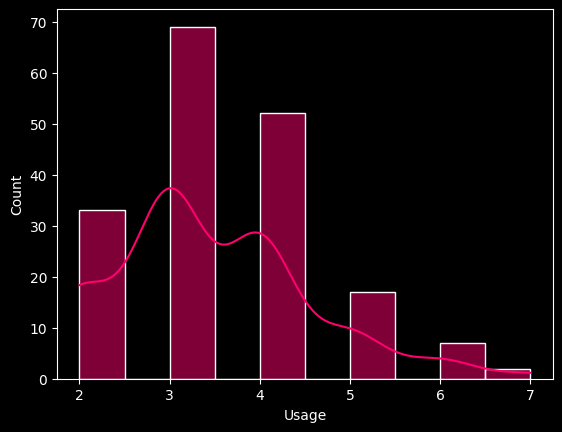

In [231]:
sns.histplot(df['Usage'], kde=True, bins=10, color="#ff006e", line_kws={"color":'yellow'})
plt.show()

## Some Calculations

In [232]:
x1 = df[df['Usage']<=4]['Usage'].count()
p1 = x1/(df['Usage'].count()) * 100
p2 = 100-p1

print(np.round(p1,2))
print(np.round(p2,2))

85.56
14.44


#### Univariate Analysis of Usage of Treadmill

##### Most of the customers use treadmill 2-4 days week
##### Less than 15% of the total buyers use treadmill more than 4 days a week

# Bivariate Analysis

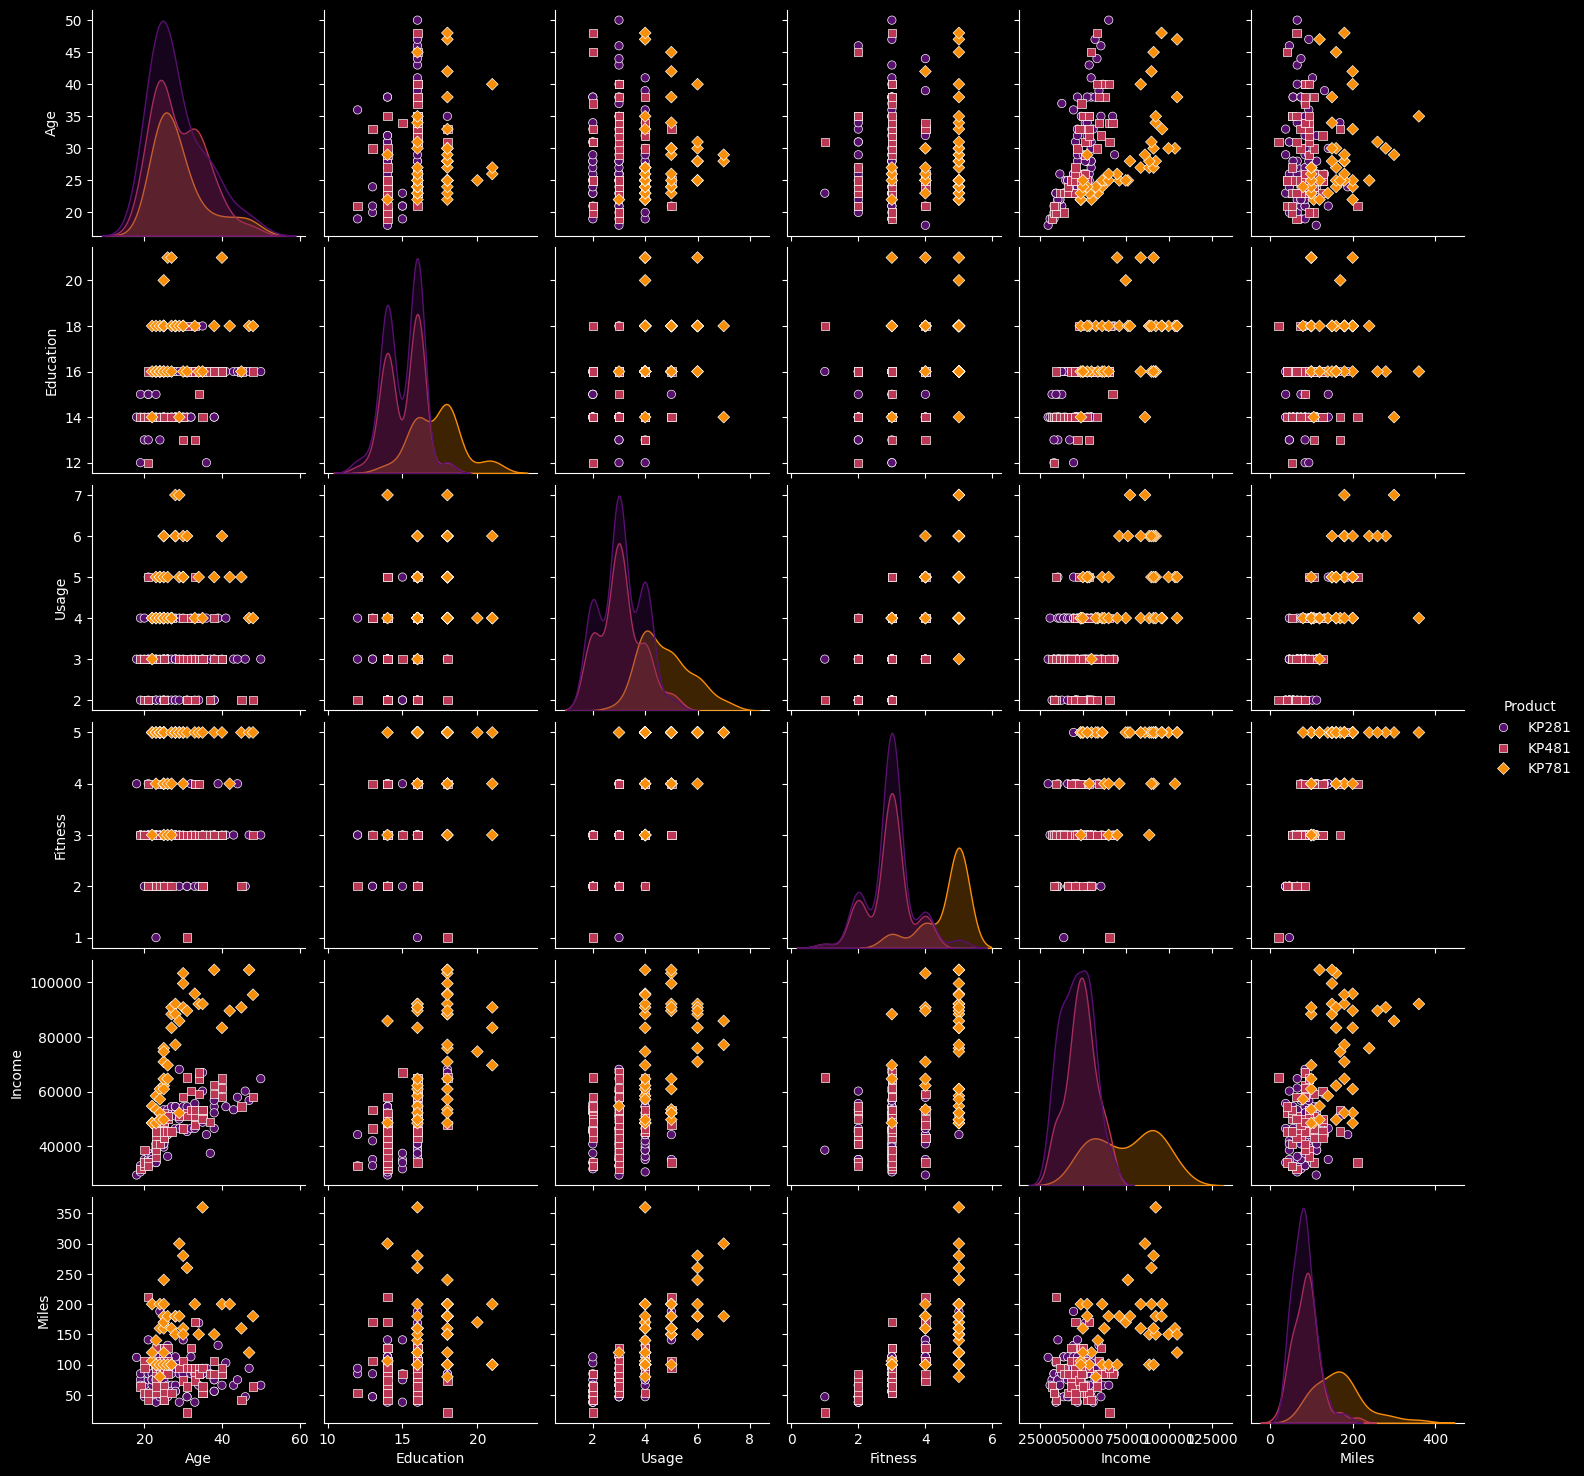

<Figure size 1200x600 with 0 Axes>

In [233]:
sns.pairplot(df, hue='Product',markers=['o','s','D'], palette='inferno')
plt.figure(figsize=(12,6))
plt.show()

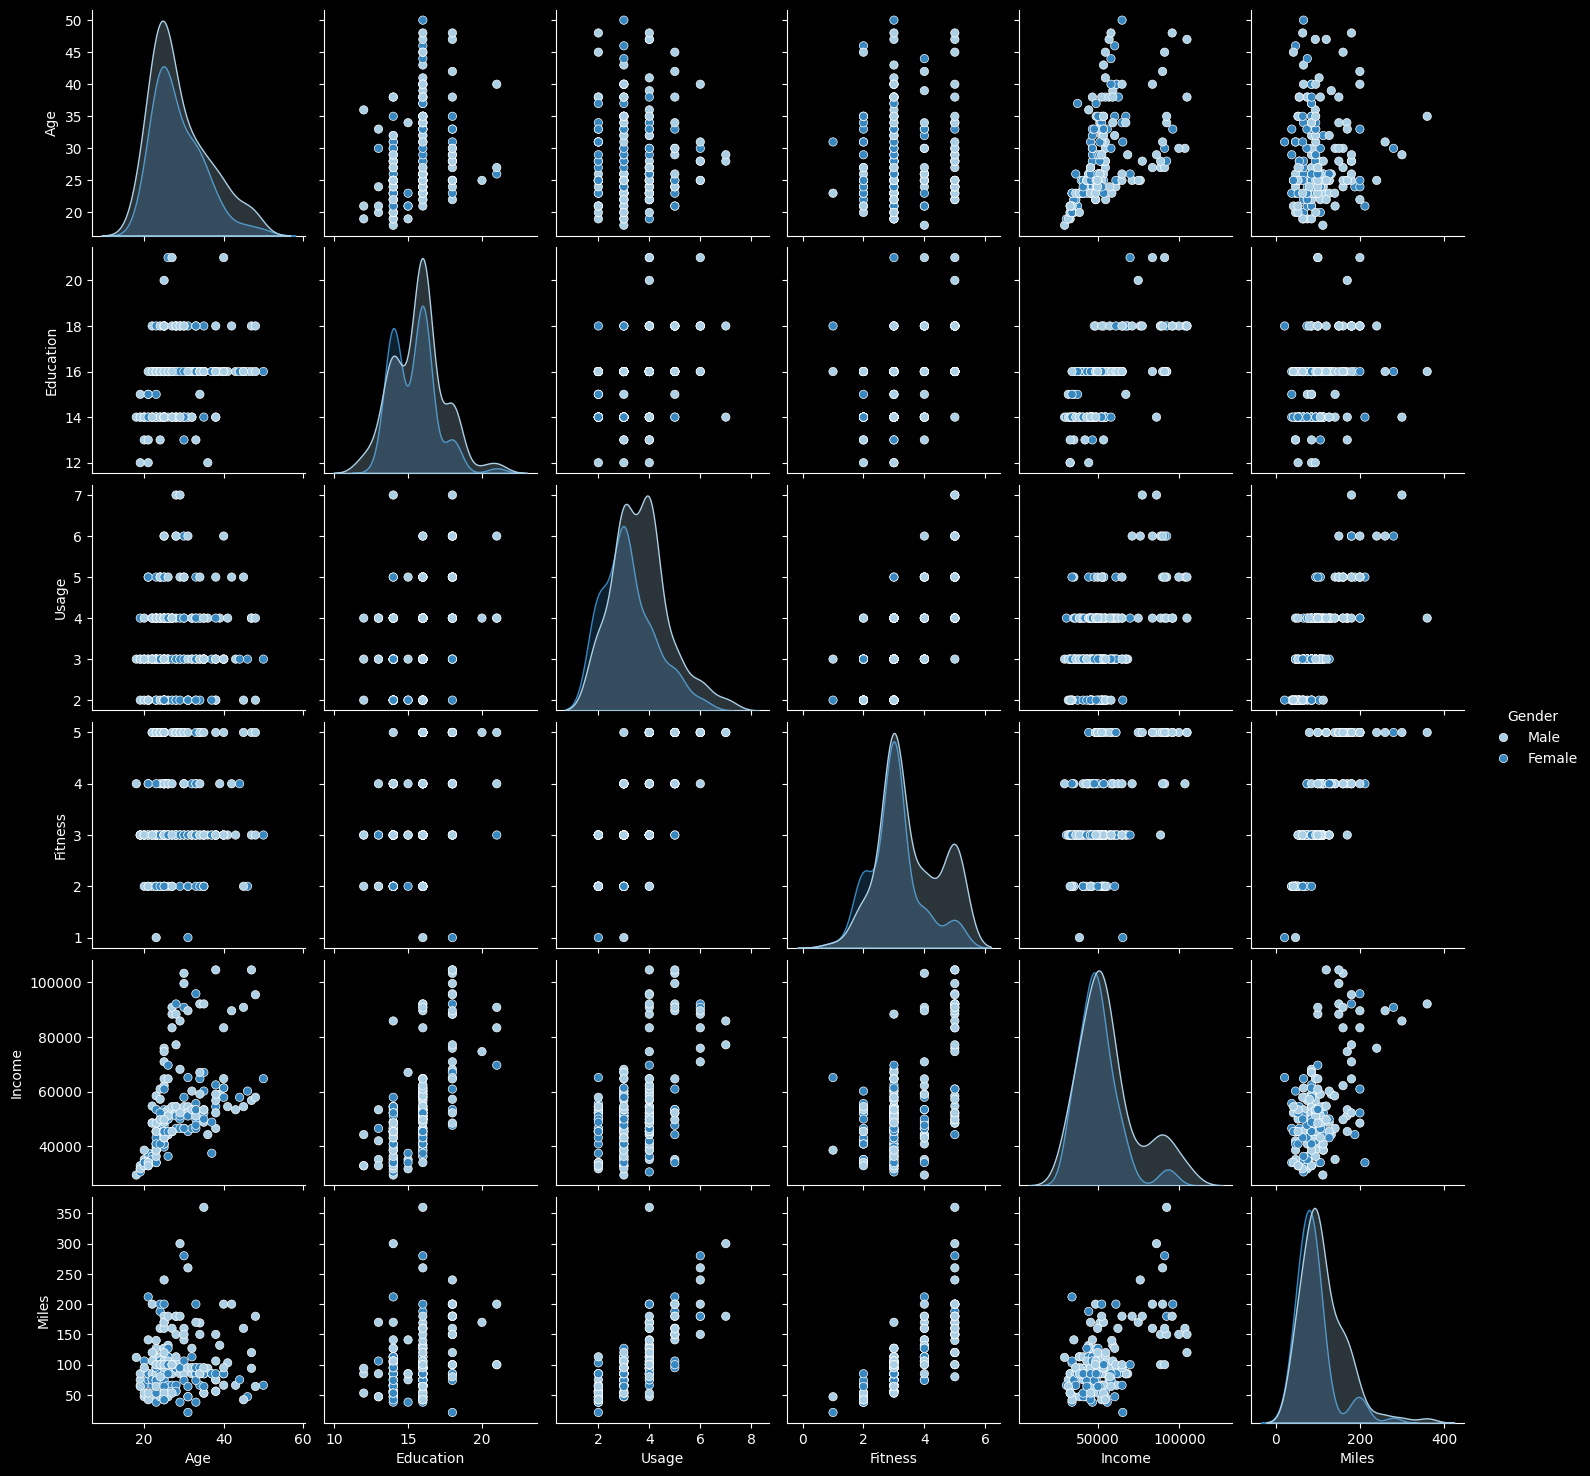

In [234]:
sns.pairplot(df, hue='Gender', palette='Blues')
plt.show()

In [235]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


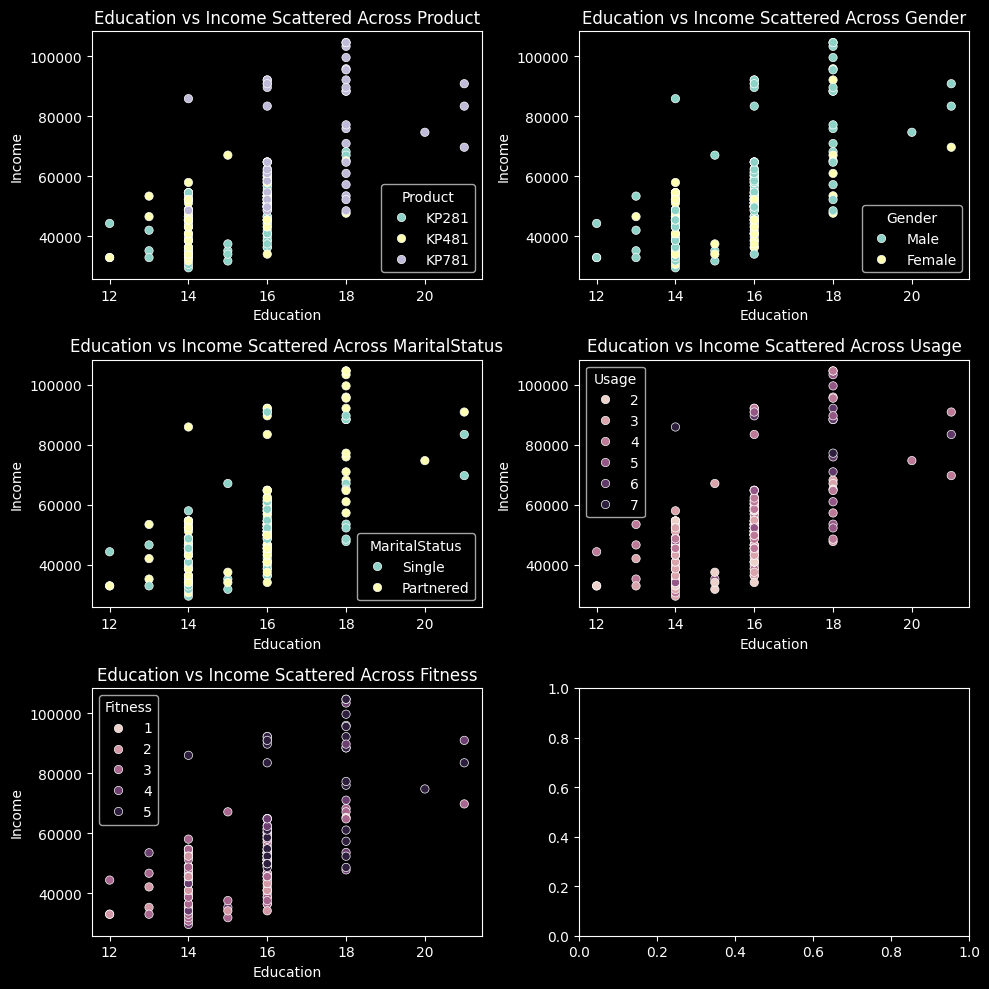

In [236]:
hue_list = ['Product', 'Gender', 'MaritalStatus', 'Usage', 'Fitness']
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axes = axes.flatten()
index = 0
for label in hue_list:
  sns.scatterplot(x='Education', y='Income',data=df, hue=label, ax=axes[index])
  axes[index].set_title(f'Education vs Income Scattered Across {label}')

  index = index + 1

fig.tight_layout()
plt.show()

## How are income and education of aerofit customers related ?

##### It s evident from the plots that customers with more years of education have higher income compared to those with less education. However, some of them with less years of education have higher incomes.

##### The customers with higher annual salary prefer to buy the costliest KP781 treadmill having advanced features.
##### Males have higher incomes compared to females
##### Partnered buyers are earning more than the customers who are single.

##### Customers with higher annual salary, find themselves more fit and most of them rated 5/5


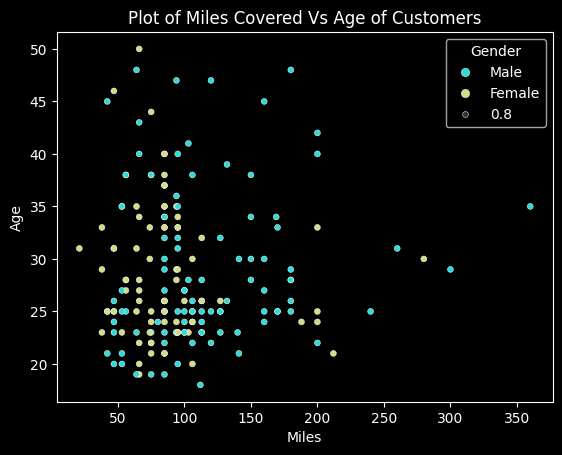

In [237]:
sns.scatterplot(x='Miles', y='Age', data=df, hue='Gender', palette='rainbow', markers=['s','^'], size=0.8)
plt.title("Plot of Miles Covered Vs Age of Customers")
plt.show()

In [238]:
p1 = df[(df['Age']<=35) & (df['Miles']<=150) & (df['Miles']>=50)]['Age'].count()/df['Age'].count() * 100

p2 = df[(df['Age']>=35) & (df['Miles']>150)]['Age'].count()/df['Age'].count() * 100
print(np.round(p1,2))
print(np.round(p2,2))

62.78
2.78


More than 62% of the customers who walk/run 50-150 miles a week, belong to the age group of 20-35 years.

While less than 3% of the buyers above age of 35, walk/run greater than 150-350 miles.

In general, males walk/run greater miles/distances than females.

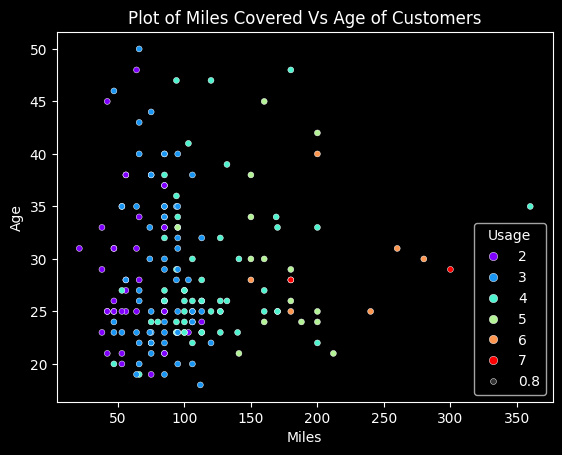

In [239]:
sns.scatterplot(x='Miles', y='Age', data=df, hue='Usage', palette='rainbow', markers=["s","^","D","o","p","H","star"], size=0.8)
plt.title("Plot of Miles Covered Vs Age of Customers")
plt.show()

As the age is increasing the usage of treadmill per week reduces.

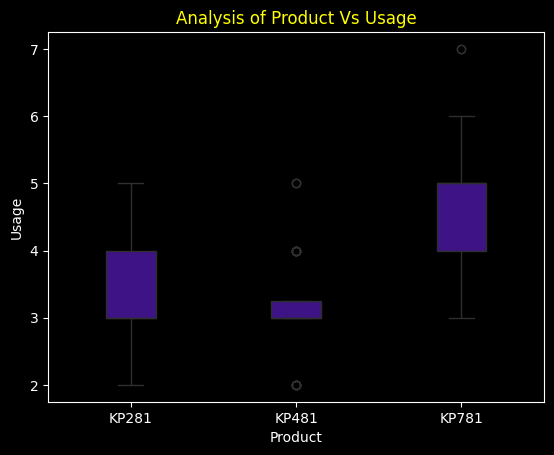

In [240]:
sns.boxplot(x='Product', y='Usage', data=df, width=0.3, color='#390099')
plt.title("Analysis of Product Vs Usage", color='Yellow')
plt.show()

The KP781 customers use treadmill very often in a week (4-5 days a week)

The customers with cheaper treadmills have lower usage

### How does the gender relate to the usage of treadmill ?

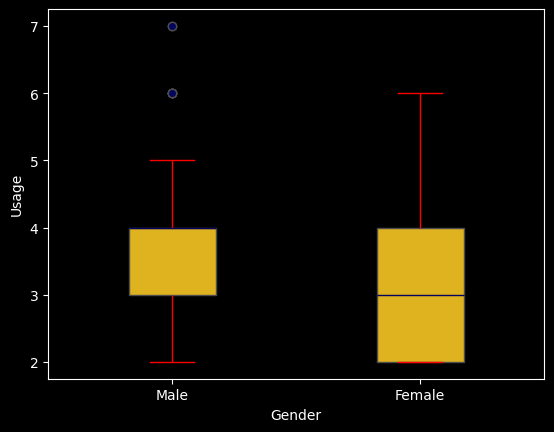

<Figure size 640x480 with 0 Axes>

In [241]:
sns.boxplot(x='Gender', y='Usage', data=df, color='#ffc300', width=0.35, medianprops={'color':'#03045e'}, flierprops={'markerfacecolor': '#03045e'}, whiskerprops={'color': 'red'}, capprops={'color': 'red'})
fig = plt.figure()
fig.set_facecolor('red')
plt.show()

Males have higher usage of treadmill per week compared to females.

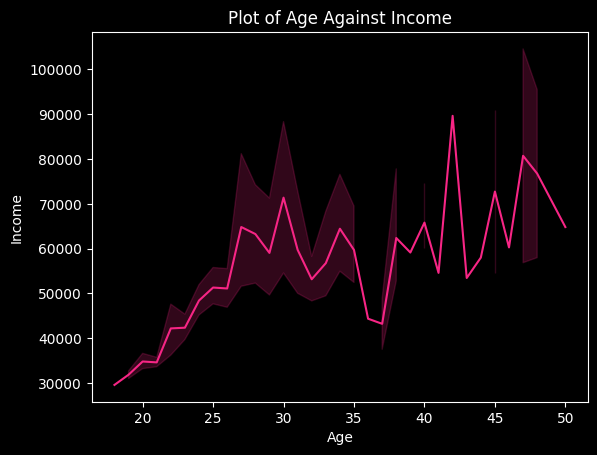

In [242]:
sns.lineplot(x='Age', y='Income', color='#f72585', data=df)
plt.title("Plot of Age Against Income")
plt.show()

Income is increasing as the age increasing. But there are some exceptional people who got higher salary in there early age only.

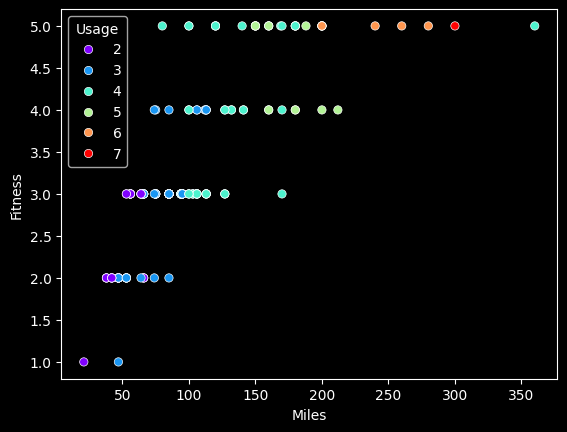

In [243]:
sns.scatterplot(data=df, x='Miles', y='Fitness', hue='Usage', palette='rainbow')
plt.show()

Clearly, the customers who walk/run more miles a week, have rated themselves higher.

Also, the customers with higher usage of treadmill find themselves more fit and eventually rated higher.

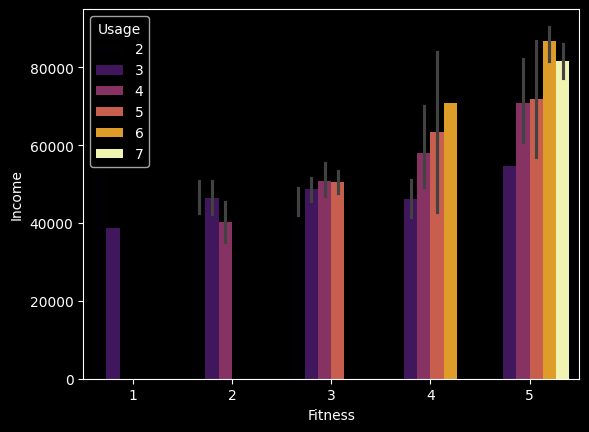

In [244]:
sns.barplot(data=df, x='Fitness', y='Income', hue='Usage', palette='inferno')
plt.show()

The customers with higher annual incomes rate themselves higher for being fit, compared to those who earn less.

Also, the customers with higher treadmill usage, also rate themselves higher.
Hence, Higher Income --> Higher Usage --> More fit


## Impact of Marital Status on the Product Purchased

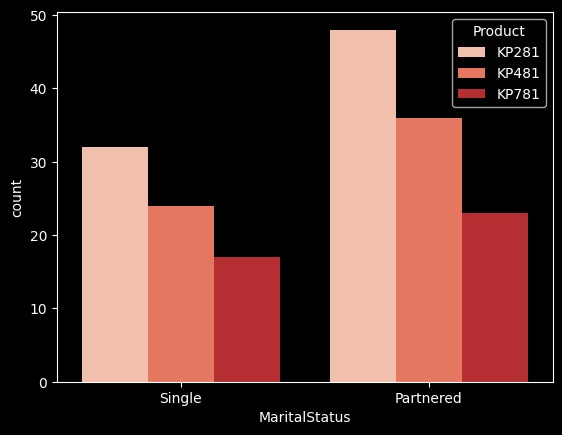

In [245]:
sns.countplot(x='MaritalStatus', hue='Product', data=df, palette='Reds')
plt.show()

The purchase of treadmill is higher for the partnered customers, while lower for the buyers who are single.

The partnered customers prefer buying costlier treadmill with advanced features.

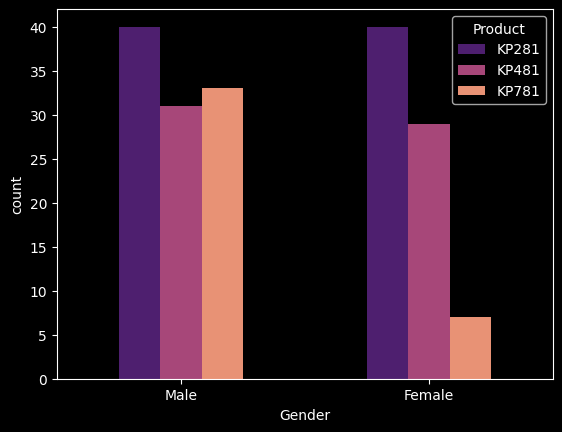

In [246]:
sns.countplot(x='Gender', hue='Product', data=df, palette='magma', width=0.5)
plt.show()

The male customers are higher than those of female customers.

Also, the male customers prefer to buy the costlier treadmills.Given KP781 is the costliest treadmill with exceptional features, about 82% of the customers who purchased KP781 treadmill were male, while remaining 18% were females.

## Impact of Age on Product Purchases

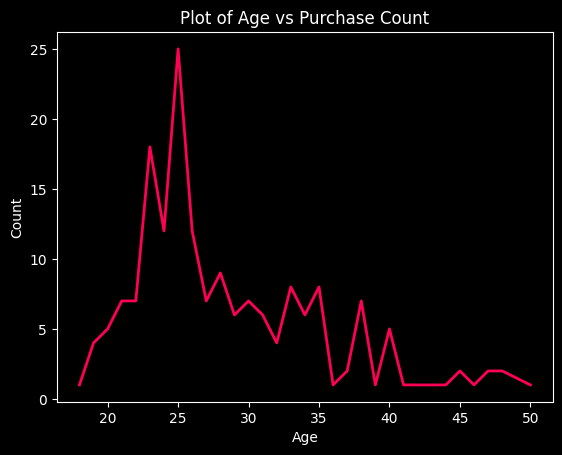

In [247]:
age = df['Age'].value_counts().index
count = df['Age'].value_counts().tolist()
count_data = pd.DataFrame({'Age':age, 'Count':count})

sns.lineplot(x='Age',y='Count',color='#ff0054',data = count_data, linewidth=2)
plt.title("Plot of Age vs Purchase Count")
plt.show()

In [248]:
df[df['Age']<=35]['Age'].count()/df['Age'].count()  * 100

84.44444444444444

The majority customer base of Aerofit belongs to the lower age group.

Almost 85% of the customers have age less than 35 years.

<ipython-input-249-7b94d009d817>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y = 'Product', data=df, palette='Blues', width=0.3)


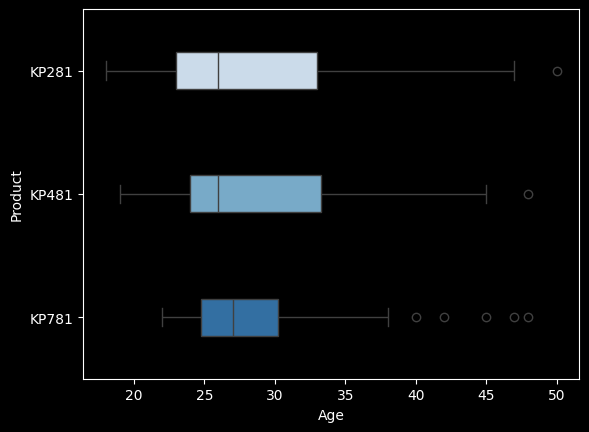

In [249]:
sns.boxplot(x='Age', y = 'Product', data=df, palette='Blues', width=0.3)
plt.show()

Majority of the customers of KP781 product lie in the age group of 25-35 years.

In [250]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Marginal Probability

In [251]:
def marginal_Probability(data, label):
  temp = df[label].value_counts()
  print(np.round(temp/df[label].count() * 100, 2))


data_cols = ['Product', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness',]

for col in data_cols:
  print(f"Marginal Probability for {col} :")
  marginal_Probability(df,col)
  print("")


Marginal Probability for Product :
KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

Marginal Probability for Gender :
Male      57.78
Female    42.22
Name: Gender, dtype: float64

Marginal Probability for Education :
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: Education, dtype: float64

Marginal Probability for MaritalStatus :
Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

Marginal Probability for Usage :
3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: Usage, dtype: float64

Marginal Probability for Fitness :
3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: Fitness, dtype: float64



## Conditional Probability

In [252]:
print("Conditional Probability for Gender : ")
cross_tab_gender = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize=False)
print(cross_tab_gender)

print("Conditional Probability of Buying a Product Given Gender is Female : ")
print("")
p1 = cross_tab_gender['KP281']['Female']/cross_tab_gender.iloc[0].sum() * 100
p2 = cross_tab_gender['KP481']['Female']/cross_tab_gender.iloc[0].sum() * 100
p3 = cross_tab_gender['KP781']['Female']/cross_tab_gender.iloc[0].sum() * 100

print(f"P(KP281 | Female) : {np.round(p1,2)}%")
print(f"P(KP481 | Female) : {np.round(p2,2)}%")
print(f"P(KP781 | Female) : {np.round(p3,2)}%")


Conditional Probability for Gender : 
Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33
Conditional Probability of Buying a Product Given Gender is Female : 

P(KP281 | Female) : 52.63%
P(KP481 | Female) : 38.16%
P(KP781 | Female) : 9.21%


In [253]:
print("Conditional Probability for Gender : ")
cross_tab_gender = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize=False)
print(cross_tab_gender)

print("Conditional Probability of Buying a Product Given Buyer is Male : ")
print("")
p1 = cross_tab_gender['KP281']['Male']/cross_tab_gender.iloc[1].sum() * 100
p2 = cross_tab_gender['KP481']['Male']/cross_tab_gender.iloc[1].sum() * 100
p3 = cross_tab_gender['KP781']['Male']/cross_tab_gender.iloc[1].sum() * 100

print(f"P(KP281 | Male) : {np.round(p1,2)}%")
print(f"P(KP481 | Male) : {np.round(p2,2)}%")
print(f"P(KP781 | Male) : {np.round(p3,2)}%")


Conditional Probability for Gender : 
Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33
Conditional Probability of Buying a Product Given Buyer is Male : 

P(KP281 | Male) : 38.46%
P(KP481 | Male) : 29.81%
P(KP781 | Male) : 31.73%


In [254]:
def conditional_Probabilility_MaritalStatus(data, label, index):
  cross_tab_maritalStatus = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], normalize=False)
  print(cross_tab_maritalStatus)
  print("")

  p1 = cross_tab_maritalStatus['KP281'][label]/cross_tab_maritalStatus.iloc[index].sum() * 100
  p2 = cross_tab_maritalStatus['KP481'][label]/cross_tab_maritalStatus.iloc[index].sum() * 100
  p3 = cross_tab_maritalStatus['KP781'][label]/cross_tab_maritalStatus.iloc[index].sum() * 100

  print(f"P(KP281 | {label}) : {np.round(p1,2)}%")
  print(f"P(KP481 | {label}) : {np.round(p2,2)}%")
  print(f"P(KP781 | {label}) : {np.round(p3,2)}%")
  print("")

print("Conditional Probability for Marital Status : Single and Products\n")
conditional_Probabilility_MaritalStatus(df, 'Single', 1)
print("Conditional Probability for Marital Status : Partnered and Products\n")
conditional_Probabilility_MaritalStatus(df, 'Partnered', 0)


Conditional Probability for Marital Status : Single and Products

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17

P(KP281 | Single) : 43.84%
P(KP481 | Single) : 32.88%
P(KP781 | Single) : 23.29%

Conditional Probability for Marital Status : Partnered and Products

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17

P(KP281 | Partnered) : 44.86%
P(KP481 | Partnered) : 33.64%
P(KP781 | Partnered) : 21.5%



### Conditional Probability for Usage and Products
#### Given that a customer buys x product, what is the probability that he uses the product y days a week?

In [255]:
def conditional_Probabilility_Usage(data, label):
  cross_tab_usage = pd.crosstab(index=df['Product'], columns=df['Usage'], normalize=False )
  print(cross_tab_usage)
  print("")

  p1 = cross_tab_usage[label][0]/cross_tab_usage[label].sum() * 100
  p2 = cross_tab_usage[label][1]/cross_tab_usage[label].sum() * 100
  p3 = cross_tab_usage[label][2]/cross_tab_usage[label].sum() * 100

  print(f"P(KP281 | {label}) : {np.round(p1,2)}%")
  print(f"P(KP481 | {label}) : {np.round(p2,2)}%")
  print(f"P(KP781 | {label}) : {np.round(p3,2)}%")

usage_labels = df['Usage'].unique().tolist()
for var in usage_labels:
  print(f"Condtional Probability For Usage {var} and Products")
  conditional_Probabilility_Usage(df, var)
  print("")



Condtional Probability For Usage 3 and Products
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2

P(KP281 | 3) : 53.62%
P(KP481 | 3) : 44.93%
P(KP781 | 3) : 1.45%

Condtional Probability For Usage 2 and Products
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2

P(KP281 | 2) : 57.58%
P(KP481 | 2) : 42.42%
P(KP781 | 2) : 0.0%

Condtional Probability For Usage 4 and Products
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2

P(KP281 | 4) : 42.31%
P(KP481 | 4) : 23.08%
P(KP781 | 4) : 34.62%

Condtional Probability For Usage 5 and Products
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2

P(KP28

### Conditional Probability for Fitness and Products

#### Given that a customer uses x product, what is the probability that he rates himself y on scale of fitness (1-5)?

In [256]:
def conditional_Probabilility_Fitness(data, label):
  cross_tab_fitness = pd.crosstab(index=df['Fitness'], columns=df['Product'], normalize=False )
  print(cross_tab_fitness)
  print("")

  p1 = df[(df['Product']==label) & (df['Fitness']==1)]['Product'].count()/df[df['Product']==label]['Product'].count() * 100
  p2 = df[(df['Product']==label) & (df['Fitness']==2)]['Product'].count()/df[df['Product']==label]['Product'].count() * 100
  p3 = df[(df['Product']==label) & (df['Fitness']==3)]['Product'].count()/df[df['Product']==label]['Product'].count() * 100
  p4 = df[(df['Product']==label) & (df['Fitness']==4)]['Product'].count()/df[df['Product']==label]['Product'].count() * 100
  p5 = df[(df['Product']==label) & (df['Fitness']==5)]['Product'].count()/df[df['Product']==label]['Product'].count() * 100

  print(f"P(1|{label}) : {np.round(p1,2)}%")
  print(f"P(2|{label}) : {np.round(p2,2)}%")
  print(f"P(3|{label}) : {np.round(p3,2)}%")
  print(f"P(4|{label}) : {np.round(p4,2)}%")
  print(f"P(5|{label}) : {np.round(p5,2)}%")


fitness_labels = df['Product'].unique().tolist()
for var in fitness_labels:
  print(f"Conditional Probability for Fitness and Product {var}")
  conditional_Probabilility_Fitness(df, var)
  print("")

Conditional Probability for Fitness and Product KP281
Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

P(1|KP281) : 1.25%
P(2|KP281) : 17.5%
P(3|KP281) : 67.5%
P(4|KP281) : 11.25%
P(5|KP281) : 2.5%

Conditional Probability for Fitness and Product KP481
Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

P(1|KP481) : 1.67%
P(2|KP481) : 20.0%
P(3|KP481) : 65.0%
P(4|KP481) : 13.33%
P(5|KP481) : 0.0%

Conditional Probability for Fitness and Product KP781
Product  KP281  KP481  KP781
Fitness                     
1            1      1      0
2           14     12      0
3           54     39      4
4            9      8      7
5            2      0     29

P(1|KP781) : 0.0%
P(2|KP781) : 0.0

In [257]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Given a customer has an annual income of >= $60000, what is the probability that he buys :
1. KP781 Product
2. KP481 Product
3. KP281 Product

In [258]:
p1 = df[(df['Income']>=60000) & (df['Product']=='KP781')]['Income'].count()/df[df['Income']>=60000]['Income'].count() * 100
p2 = df[(df['Income']>=60000) & (df['Product']=='KP481')]['Income'].count()/df[df['Income']>=60000]['Income'].count() * 100
p3 = df[(df['Income']>=60000) & (df['Product']=='KP281')]['Income'].count()/df[df['Income']>=60000]['Income'].count() * 100

print(f"Conditional Probability for Product KP781 & Annual Income >=60000 : {np.round(p1,2)}%")
print(f"Conditional Probability for Product KP481 & Annual Income >=60000 : {np.round(p2,2)}%")
print(f"Conditional Probability for Product KP281 & Annual Income >=60000 : {np.round(p3,2)}%")

Conditional Probability for Product KP781 & Annual Income >=60000 : 69.05%
Conditional Probability for Product KP481 & Annual Income >=60000 : 16.67%
Conditional Probability for Product KP281 & Annual Income >=60000 : 14.29%


### Given a customer has an annual income of < $60000, what is the probability that he buys :
1. KP781 Product
2. KP481 Product
3. KP281 Product

In [259]:
p1 = df[(df['Income']<60000) & (df['Product']=='KP781')]['Income'].count()/df[df['Income']<60000]['Income'].count() * 100
p2 = df[(df['Income']<60000) & (df['Product']=='KP481')]['Income'].count()/df[df['Income']<60000]['Income'].count() * 100
p3 = df[(df['Income']<60000) & (df['Product']=='KP281')]['Income'].count()/df[df['Income']<60000]['Income'].count() * 100

print(f"Conditional Probability for Product KP781 & Annual Income <60000 : {np.round(p1,2)}%")
print(f"Conditional Probability for Product KP481 & Annual Income <60000 : {np.round(p2,2)}%")
print(f"Conditional Probability for Product KP281 & Annual Income <60000 : {np.round(p3,2)}%")

Conditional Probability for Product KP781 & Annual Income <60000 : 7.97%
Conditional Probability for Product KP481 & Annual Income <60000 : 38.41%
Conditional Probability for Product KP281 & Annual Income <60000 : 53.62%


## Customer Profiling for Each Product Type ⭐️

#### KP281

* Easily affordable entry level product, which is also the maximum selling product.

* KP281 is the most popular product among the entry level customers.

* This product is easily afforded by both Male and Female customers.

#### KP481

* This is an Intermediate level Product.

* KP481 is the second most popular product among the customers.

* More Female customers prefer this product than males.

* Probability of Female customer buying KP481 is significantly higher than male.

* Average Usage of this product is 3 days per week.

* More Partnered customers prefer this product.

#### KP781

* Due to the High Price & being the advanced type, customer prefers less of this product.

* Customers who use this product have rated excelled shape as fitness rating.

* Customers use 4 to 5 times a week at least.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

* This product is preferred by the customer where the correlation between Education and Income is High.

Recommendations:

1. For selling more KP781 treadmill : company should target people with higer salaries (>70k) & also males are more tends to buy it.

2. Also KP781 treadmill's targeted customers will having age between 22-35

3. Single people with high income mostly prefer KP781 treadmill that will be most important target audiance for Aerofit

4. As the KP781 Product is costliest with advanced functionalities, therefore in order to increase the sales of this product type, discounts could be given so that the customers with lower annual income could afford them.

5. The KP481 and KP281 Products are budget friendly and preferred by customers having less annual income. Therefore, these products can be marketed as budget friendly products.

6. Since, the majority customers are male, therefore special discounts can be given to the female customers which can increase the overall count of female buyers and increase the sales of KP781 product also.
